In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/github_LEAF_LAB/survey_analysis/SMILE-College Dataset

/content/drive/MyDrive/github_LEAF_LAB/survey_analysis/SMILE-College Dataset


# Load Dataset

In [1]:
# Function to load dataset
import pandas as pd
path = "/content/drive/MyDrive/github_LEAF_LAB/survey_analysis/SMILE-College Dataset/smile-college-dataset.csv"
def load_dataset(path):
  df = pd.read_csv(path)
  desired_columns = ['School', 'comment', 'Validated_Labels']
  df = df[desired_columns]
  df = df[df['Validated_Labels'] != 'SKIP']
  return df

df = load_dataset(path)
df.head()



,School,comment,Validated_Labels
0,University of Washington,i think there needs to be an expansion. one qu...,DISSATISFIED
1,Haverford College,not too sure. don't have a ton of exposure to ...,NEUTRAL
2,University of Washington,i have looked at group counseling but they are...,DISSATISFIED
3,Barnard,not much in my opinion i’d working well. i thi...,DISSATISFIED
4,El Camino Community College District,the group sessions for stress relief and medit...,SATISFIED


# **Exploratory Data Analysis** - Basic Statistics



In [8]:
csv_filename = "filtered_comments_with_less_than_12_words.csv"
df.to_csv(csv_filename, index=False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 793
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   School            793 non-null    object
 1   comment           793 non-null    object
 2   Validated_Labels  793 non-null    object
dtypes: object(3)
memory usage: 24.8+ KB


In [3]:
df.describe()

,School,comment,Validated_Labels
count,793,793,793
unique,256,793,4
top,Arizona State,i think there needs to be an expansion. one qu...,DISSATISFIED
freq,100,1,376


In [4]:
df["Validated_Labels"].value_counts()

DISSATISFIED    376
MIXED           220
SATISFIED       107
NEUTRAL          90
Name: Validated_Labels, dtype: int64

<Axes: xlabel='Validated_Labels', ylabel='count'>

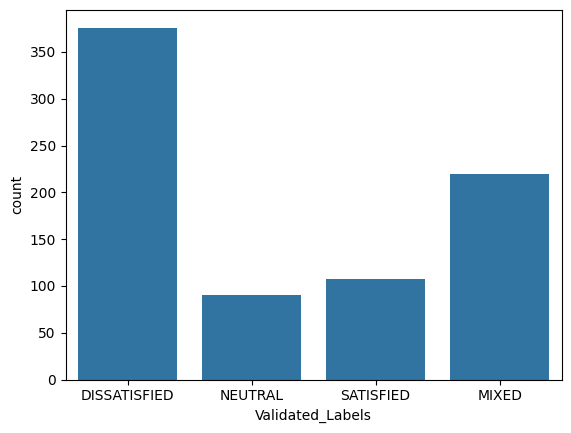

In [5]:
import seaborn as sns
sns.countplot(x='Validated_Labels', data=df)

In [7]:
import pandas as pd
# Assuming df is your DataFrame

# First, we'll define a function to count words and sentences in comments
def count_words_sentences(text):
    word_count = len(text.split())
    sentence_count = len(text.split('.'))
    return pd.Series([word_count, sentence_count], index=['word_count', 'sentence_count'])

# Apply the function to each comment and assign the results as new columns to the df DataFrame
df = df.assign(
    word_count=df['comment'].apply(lambda x: len(x.split())),
    sentence_count=df['comment'].apply(lambda x: len(x.split('.')))
)

# Now, we aggregate these counts by label to find avg, min, max for words and sentences
aggregated = df.groupby('Validated_Labels').agg({
    'word_count': ['mean', 'min', 'max'],
    'sentence_count': ['mean', 'min', 'max']
})

# This will give you a multi-level column index DataFrame with the statistics for each label
print(aggregated)


                 word_count          sentence_count        
                       mean min  max           mean min max
Validated_Labels                                           
DISSATISFIED      33.018617  12  199       2.515957   1  11
MIXED             28.068182  12  106       2.422727   1   8
NEUTRAL           18.155556  12   46       2.033333   1   5
SATISFIED         21.841121  12   93       1.897196   1   7


In [8]:
import pandas as pd
# Assuming df is your DataFrame

# Group the DataFrame by label and school to count the occurrences
school_counts = df.groupby(['Validated_Labels', 'School']).size().reset_index(name='counts')

# Find the number of unique schools for each label
unique_schools = school_counts.groupby('Validated_Labels').School.nunique().reset_index(name='unique_schools')

# Find the school with the maximum records for each label
max_records_school = school_counts.loc[school_counts.groupby('Validated_Labels')['counts'].idxmax()].rename(columns={'School': 'school_with_max_records', 'counts': 'max_records'})

# Merge the unique_schools and max_records_school on label
final_stats = pd.merge(unique_schools, max_records_school[['Validated_Labels', 'school_with_max_records', 'max_records']], on='Validated_Labels', how='left')

print(final_stats)



  Validated_Labels  unique_schools school_with_max_records  max_records
0     DISSATISFIED             166           Arizona State           47
1            MIXED             112           Arizona State           19
2          NEUTRAL              55           Arizona State           23
3        SATISFIED              76           Arizona State           11


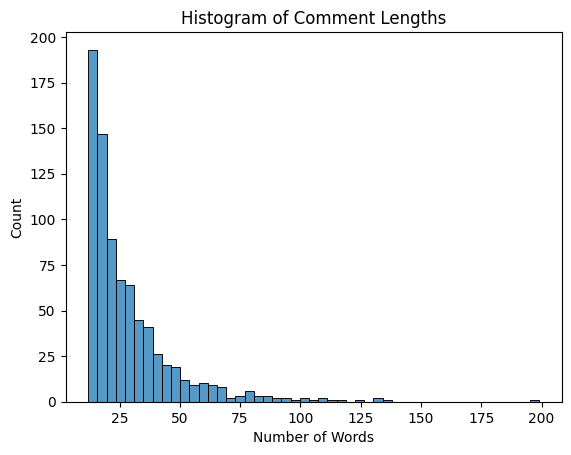

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Num_Words'] = df['comment'].str.split().apply(len)

# Plot a histogram for the number of words
sns.histplot(df['Num_Words'])

# Set labels and title
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Histogram of Comment Lengths')

# Display the plot
plt.show()

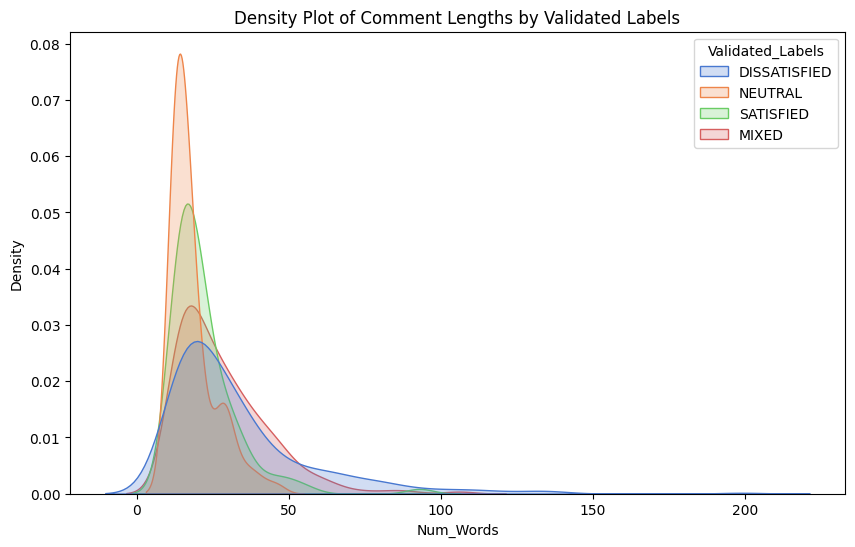

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Comment' and 'validated_labels' columns

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot density plots with different colors for each label
sns.kdeplot(data=df, x='Num_Words', hue='Validated_Labels', fill=True, common_norm=False, palette="muted")

# Set labels and title
plt.xlabel('Num_Words')
plt.ylabel('Density')
plt.title('Density Plot of Comment Lengths by Validated Labels')

# Display the plot
plt.show()


In [11]:
import pandas as pd

# Create a DataFrame with the number of records for each school
records_per_school = df['School'].value_counts().reset_index()
records_per_school.columns = ['School', 'Total Records']

# Create a new DataFrame for label counts within each school
label_counts_per_school = df.groupby(['School', 'Validated_Labels']).size().unstack(fill_value=0)

# Join the two DataFrames on the 'School' column
result_df = pd.merge(records_per_school, label_counts_per_school, on='School')

# Save the result_df to a new DataFrame for traversal
traversal_df = result_df.copy()

In [12]:
traversal_df.head(10)

,School,Total Records,DISSATISFIED,MIXED,NEUTRAL,SATISFIED
0,Arizona State,100,47,19,23,11
1,University of Arizona,23,9,10,3,1
2,Stony Brook University,18,10,3,3,2
3,UB,18,11,4,1,2
4,Ohio State,17,9,6,1,1
5,Haverford College,13,5,6,2,0
6,UConn,13,3,5,1,4
7,UMich,12,8,4,0,0
8,Rowan,11,5,4,1,1
9,Virginia,11,5,4,0,2


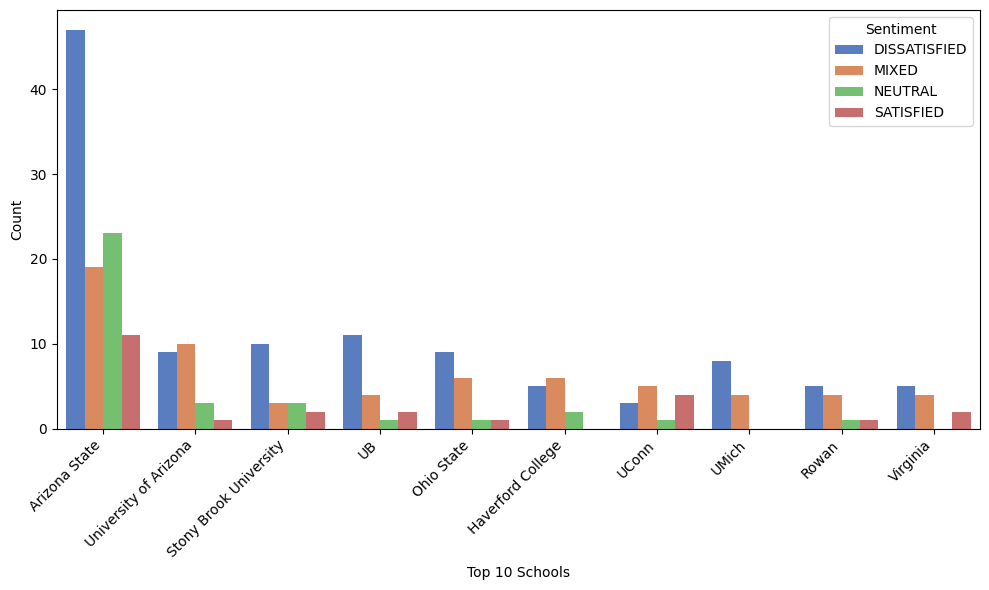

In [13]:
traversal_df = traversal_df.sort_values(by='Total Records', ascending=False)
traversal_df_top10 = traversal_df.head(10)

melted_df = pd.melt(traversal_df_top10, id_vars=['School', 'Total Records'], var_name='Sentiment', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='School', y='Count', hue='Sentiment', palette='muted')

# Set labels and title
plt.xlabel('Top 10 Schools')
plt.ylabel('Count')
# plt.title('Sentiment Counts for Top 10 Schools')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.tight_layout()
plt.show()

In [14]:
percentage_df = result_df.copy()
percentage_df['MIXED'] = (percentage_df['MIXED'] / percentage_df['Total Records'] * 100).round(1)
percentage_df['NEUTRAL'] = (percentage_df['NEUTRAL'] / percentage_df['Total Records'] * 100).round(1)
percentage_df['DISSATISFIED'] = (percentage_df['DISSATISFIED'] / percentage_df['Total Records'] * 100).round(1)
percentage_df['SATISFIED'] = (percentage_df['SATISFIED'] / percentage_df['Total Records'] * 100).round(1)

In [15]:
percentage_df.head(10)

,School,Total Records,DISSATISFIED,MIXED,NEUTRAL,SATISFIED
0,Arizona State,100,47.0,19.0,23.0,11.0
1,University of Arizona,23,39.1,43.5,13.0,4.3
2,Stony Brook University,18,55.6,16.7,16.7,11.1
3,UB,18,61.1,22.2,5.6,11.1
4,Ohio State,17,52.9,35.3,5.9,5.9
5,Haverford College,13,38.5,46.2,15.4,0.0
6,UConn,13,23.1,38.5,7.7,30.8
7,UMich,12,66.7,33.3,0.0,0.0
8,Rowan,11,45.5,36.4,9.1,9.1
9,Virginia,11,45.5,36.4,0.0,18.2


# **Exploratory Data Analysis** - Frequency based analysis

SATISFIED


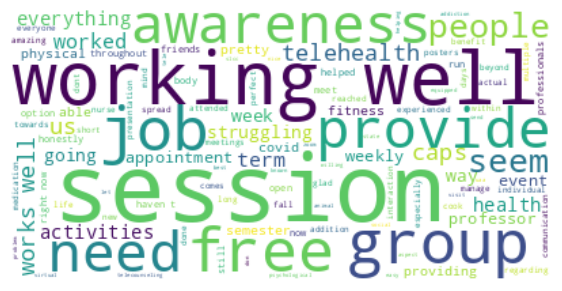



DISSATISFIED


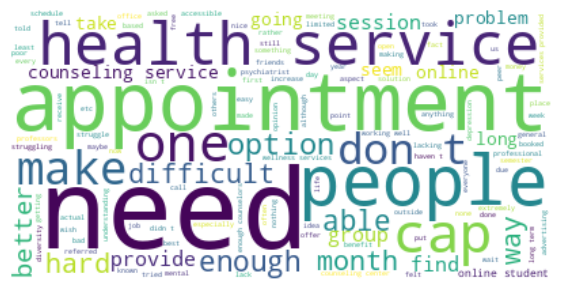



NEUTRAL


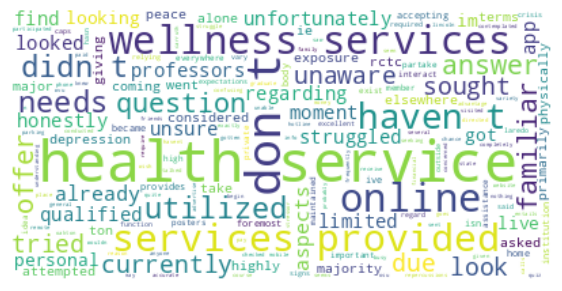



MIXED


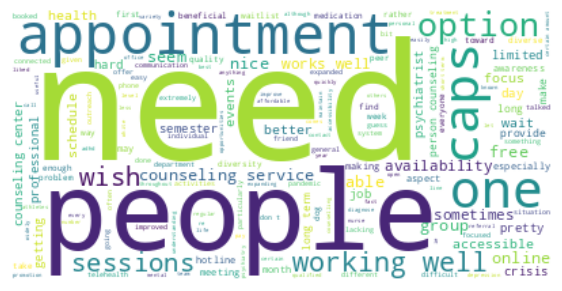

In [16]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def freq_word_cloud(df, labels, max_words):
    wordclouds = {}

    for label in labels:
        df_ = df.loc[df['Validated_Labels'] == label].copy()

        df_['Comments_processed'] = df_['comment'].map(lambda x: re.sub('[,\.!?]', '', x))
        df_['Comments_processed'] = df_['Comments_processed'].map(lambda x: x.lower())

        long_string = ','.join(list(df_['Comments_processed'].values))
        wordcloud = WordCloud(background_color="white", max_words=max_words, contour_width=4, contour_color='steelblue')
        wordcloud.generate(long_string)

        wordclouds[label] = wordcloud

    common_words = set.intersection(*(set(wordcloud.words_) for wordcloud in wordclouds.values()))

    # Create word clouds for each label excluding common words
    for label in labels:
        final_wordcloud = WordCloud(background_color="white", max_words=max_words, contour_width=4, contour_color='steelblue')
        final_wordcloud.generate_from_frequencies({word: freq for word, freq in wordclouds[label].words_.items() if word not in common_words})

        plt.figure(figsize=(700 / 100, 400 / 100))
        plt.imshow(final_wordcloud, interpolation='bilinear')
        print(label)
        # plt.title(f'Word Cloud for {label}')
        plt.axis('off')
        plt.show()
        print('\n')

labels_to_plot = ["SATISFIED", "DISSATISFIED", "NEUTRAL", "MIXED"]
freq_word_cloud(df, labels_to_plot, 6000)

